LOAD DATA:

In [0]:
import numpy as np 
import os 
###https://www.geeksforgeeks.org/working-zip-files-python/
##import zip code from here

# importing required modules 
from zipfile import ZipFile 

# opening the zip file in READ mode
with ZipFile('/content/foreign-exchange-rates-per-dollar-20002019.zip', 'r') as zip: 
    # printing all the contents of the zip file 
    # zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

Extracting all the files now...
Done!


In [0]:
import pandas as pd
xdf = pd.read_excel (r'/content/Foreign_Exchange_Rates.xlsx')
xdf

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,MEXICO - MEXICAN PESO/US$,SOUTH AFRICA - RAND/US$,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,43.55,1128,9.4015,6.126,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,1122.5,9.457,6.085,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,43.55,1135,9.535,6.07,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,43.55,1146.5,9.567,6.08,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,43.55,1138,9.52,6.057,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5212,2019-12-25,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND
5213,2019-12-26,1.4411,0.9007,1.5002,0.7688,4.0602,1.3124,6.9949,7.788,71.28,1161.18,18.944,14.132,1.354,6.7295,109.67,4.1337,8.8799,9.4108,181.3,0.9808,30.11,30.15
5214,2019-12-27,1.4331,0.8949,1.4919,0.7639,4.0507,1.3073,6.9954,7.7874,71.45,1160.87,18.819,14.025,1.352,6.6829,109.47,4.126,8.8291,9.3405,181.35,0.9741,30.09,30.14
5215,2019-12-30,1.4278,0.8915,1.4846,0.761,4.0152,1.3058,6.9864,7.7857,71.3,1155.75,18.863,14.056,1.3483,6.6589,108.85,4.1053,8.7839,9.3145,181.6,0.9677,30.04,29.94


In [0]:
xdf.columns

Index(['Time Serie', 'AUSTRALIA - AUSTRALIAN DOLLAR/US$',
       'EURO AREA - EURO/US$', 'NEW ZEALAND - NEW ZELAND DOLLAR/US$',
       'UNITED KINGDOM - UNITED KINGDOM POUND/US$', 'BRAZIL - REAL/US$',
       'CANADA - CANADIAN DOLLAR/US$', 'CHINA - YUAN/US$',
       'HONG KONG - HONG KONG DOLLAR/US$', 'INDIA - INDIAN RUPEE/US$',
       'KOREA - WON/US$', 'MEXICO - MEXICAN PESO/US$',
       'SOUTH AFRICA - RAND/US$', 'SINGAPORE - SINGAPORE DOLLAR/US$',
       'DENMARK - DANISH KRONE/US$', 'JAPAN - YEN/US$',
       'MALAYSIA - RINGGIT/US$', 'NORWAY - NORWEGIAN KRONE/US$',
       'SWEDEN - KRONA/US$', 'SRI LANKA - SRI LANKAN RUPEE/US$',
       'SWITZERLAND - FRANC/US$', 'TAIWAN - NEW TAIWAN DOLLAR/US$',
       'THAILAND - BAHT/US$'],
      dtype='object')

In [0]:
# RENAME DATE attribute
xdf.rename(columns={'Time Serie':'DATE'}, inplace=True) 

In [0]:
# replace ND with nan and then replace their values with backward and forward values.
xdf = xdf.replace("ND", np.nan)
xdf = xdf.fillna(method='bfill').fillna(method='ffill')

In [0]:
# set DATE column as index of the dataframe:
xdf = xdf.set_index("DATE")
# xdf.head()

In [0]:
xdf.index = pd.to_datetime(xdf.index)

In [0]:
# typeconversion of all
xdf = xdf.astype(float)

In [0]:
# length of records:
len(xdf)

5217

In [0]:
print("Total number of days between {} and {} are {}".format(xdf.index.min().date(), xdf.index.max().date(), (xdf.index.max() - xdf.index.min()).days+1))

Total number of days between 2000-01-03 and 2019-12-31 are 7303


In [0]:
# Prepare a full dataframe
num_records = 7303
data = {}

In [0]:
# fill all the columns with columns
data["DATE"] = pd.date_range("2000-01-03", "2019-12-31")

In [0]:
# all th range from 2000 jan to 2019 dec
data['DATE']

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-08', '2000-01-09', '2000-01-10',
               '2000-01-11', '2000-01-12',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=7303, freq='D')

In [0]:
complete = pd.DataFrame(data=data)
# new dataframe 
complete

,DATE
0,2000-01-03
1,2000-01-04
2,2000-01-05
3,2000-01-06
4,2000-01-07
...,...
7298,2019-12-27
7299,2019-12-28
7300,2019-12-29
7301,2019-12-30


In [0]:
xdf.head()

,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,MEXICO - MEXICAN PESO/US$,SOUTH AFRICA - RAND/US$,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
DATE,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,1128.0,9.4015,6.126,1.6563,7.3290,101.70,3.8,7.964,8.4430,72.30,1.5808,31.38,36.97
2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,1122.5,9.4570,6.085,1.6535,7.2180,103.09,3.8,7.934,8.3600,72.65,1.5565,30.60,37.13
2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,1135.0,9.5350,6.070,1.6560,7.2080,103.77,3.8,7.935,8.3530,72.95,1.5526,30.80,37.10
2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,1146.5,9.5670,6.080,1.6655,7.2125,105.19,3.8,7.940,8.3675,72.95,1.5540,31.75,37.62
2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,1138.0,9.5200,6.057,1.6625,7.2285,105.17,3.8,7.966,8.4150,73.15,1.5623,30.85,37.30


In [0]:
# index replace:
complete = complete.set_index("DATE")

In [0]:
complete = pd.concat([complete,xdf], axis=1)

In [0]:
complete

,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,MEXICO - MEXICAN PESO/US$,SOUTH AFRICA - RAND/US$,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
DATE,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,1128.00,9.4015,6.126,1.6563,7.3290,101.70,3.8000,7.9640,8.4430,72.30,1.5808,31.38,36.97
2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,1122.50,9.4570,6.085,1.6535,7.2180,103.09,3.8000,7.9340,8.3600,72.65,1.5565,30.60,37.13
2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,1135.00,9.5350,6.070,1.6560,7.2080,103.77,3.8000,7.9350,8.3530,72.95,1.5526,30.80,37.10
2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,1146.50,9.5670,6.080,1.6655,7.2125,105.19,3.8000,7.9400,8.3675,72.95,1.5540,31.75,37.62
2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,1138.00,9.5200,6.057,1.6625,7.2285,105.17,3.8000,7.9660,8.4150,73.15,1.5623,30.85,37.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,1.4331,0.8949,1.4919,0.7639,4.0507,1.3073,6.9954,7.7874,71.45,1160.87,18.8190,14.025,1.3520,6.6829,109.47,4.1260,8.8291,9.3405,181.35,0.9741,30.09,30.14
2019-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# fill na value by above and below rows
complete = complete.fillna(method='bfill').fillna(method='ffill')

In [0]:
complete.tail()

,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,MEXICO - MEXICAN PESO/US$,SOUTH AFRICA - RAND/US$,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
DATE,,,,,,,,,,,,,,,,,,,,,,
2019-12-27,1.4331,0.8949,1.4919,0.7639,4.0507,1.3073,6.9954,7.7874,71.45,1160.87,18.819,14.025,1.3520,6.6829,109.47,4.1260,8.8291,9.3405,181.35,0.9741,30.09,30.14
2019-12-28,1.4278,0.8915,1.4846,0.7610,4.0152,1.3058,6.9864,7.7857,71.30,1155.75,18.863,14.056,1.3483,6.6589,108.85,4.1053,8.7839,9.3145,181.60,0.9677,30.04,29.94
2019-12-29,1.4278,0.8915,1.4846,0.7610,4.0152,1.3058,6.9864,7.7857,71.30,1155.75,18.863,14.056,1.3483,6.6589,108.85,4.1053,8.7839,9.3145,181.60,0.9677,30.04,29.94
2019-12-30,1.4278,0.8915,1.4846,0.7610,4.0152,1.3058,6.9864,7.7857,71.30,1155.75,18.863,14.056,1.3483,6.6589,108.85,4.1053,8.7839,9.3145,181.60,0.9677,30.04,29.94
2019-12-31,1.4225,0.8907,1.4826,0.7536,4.0190,1.2962,6.9618,7.7894,71.36,1155.46,18.860,13.973,1.3446,6.6554,108.67,4.0918,8.7823,9.3425,181.30,0.9677,29.91,29.75


In [0]:
# to visualise after filling the na values
toInspect = ["INDIA - INDIAN RUPEE/US$", "CHINA - YUAN/US$", "EURO AREA - EURO/US$"]

In [0]:
rows, cols = 3, 2

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


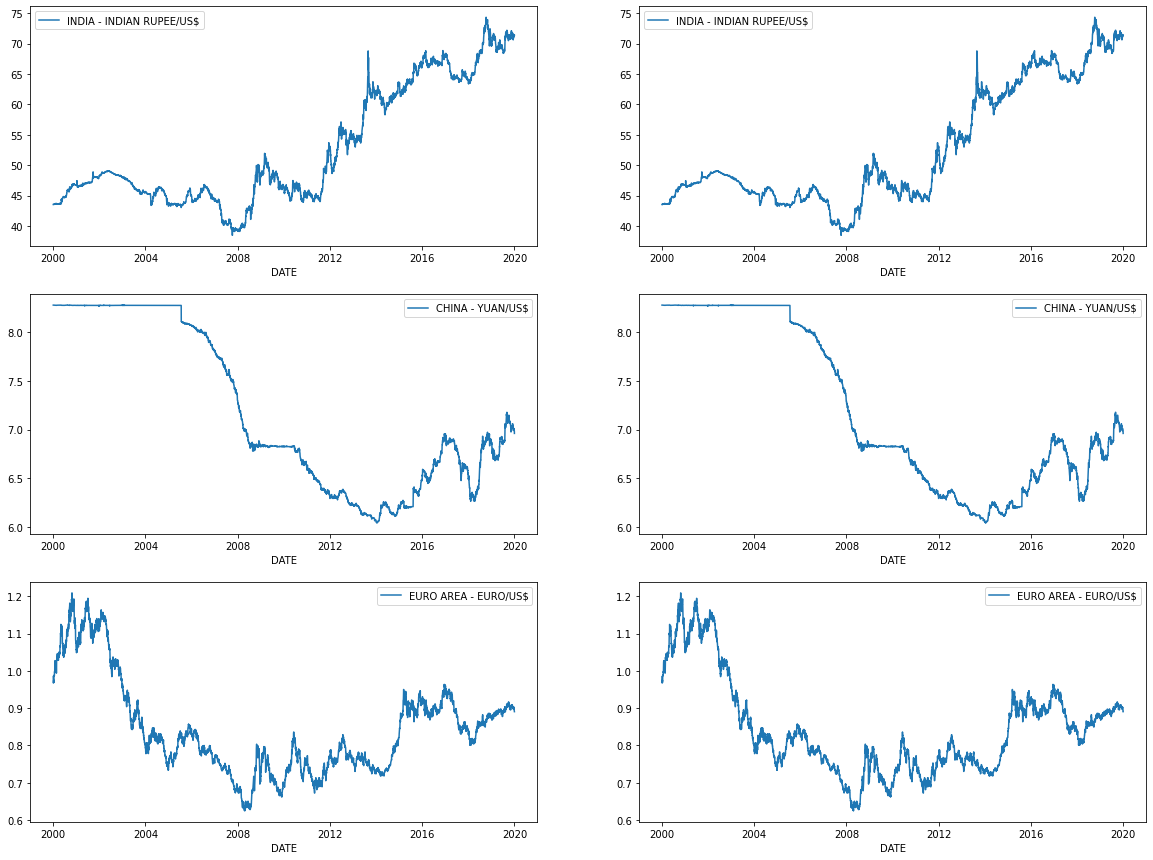

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(rows, cols, figsize=(20,rows*5))
for row in range(rows):
    sns.lineplot(data=xdf[[toInspect[row]]], ax=ax[row][0])
    sns.lineplot(data=complete[[toInspect[row]]], ax=ax[row][1])

 Visualization to show that:even after interpolating the nan values property of data did't change

In [0]:
# for creating dataframe of required number of column and rows:
def For_one_Timeseries_data(column_,window):
  X=[]
  y=[]
  n=len(column_)
  for i in range(n):
    end=i+window
    if end < (n-1):
      X.append(column_[i:end])
      y.append(column_[end])
    else:
      break
  return np.array(X), np.array(y)

In [0]:
xdf.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2019-12-18', '2019-12-19', '2019-12-20', '2019-12-23',
               '2019-12-24', '2019-12-25', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='DATE', length=5217, freq=None)

ARIMA:   https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/


In [0]:
xdf['DATE']=xdf.index
xdf.head()

,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,MEXICO - MEXICAN PESO/US$,SOUTH AFRICA - RAND/US$,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$,DATE
DATE,,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,1128.0,9.4015,6.126,1.6563,7.3290,101.70,3.8,7.964,8.4430,72.30,1.5808,31.38,36.97,2000-01-03
2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,1122.5,9.4570,6.085,1.6535,7.2180,103.09,3.8,7.934,8.3600,72.65,1.5565,30.60,37.13,2000-01-04
2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,1135.0,9.5350,6.070,1.6560,7.2080,103.77,3.8,7.935,8.3530,72.95,1.5526,30.80,37.10,2000-01-05
2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,1146.5,9.5670,6.080,1.6655,7.2125,105.19,3.8,7.940,8.3675,72.95,1.5540,31.75,37.62,2000-01-06
2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,1138.0,9.5200,6.057,1.6625,7.2285,105.17,3.8,7.966,8.4150,73.15,1.5623,30.85,37.30,2000-01-07


In [0]:
xdf.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2019-12-18', '2019-12-19', '2019-12-20', '2019-12-23',
               '2019-12-24', '2019-12-25', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='DATE', length=5217, freq=None)

In [0]:
xdf.head()

,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,MEXICO - MEXICAN PESO/US$,SOUTH AFRICA - RAND/US$,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$,DATE
DATE,,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,1128.0,9.4015,6.126,1.6563,7.3290,101.70,3.8,7.964,8.4430,72.30,1.5808,31.38,36.97,2000-01-03
2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,1122.5,9.4570,6.085,1.6535,7.2180,103.09,3.8,7.934,8.3600,72.65,1.5565,30.60,37.13,2000-01-04
2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,1135.0,9.5350,6.070,1.6560,7.2080,103.77,3.8,7.935,8.3530,72.95,1.5526,30.80,37.10,2000-01-05
2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,1146.5,9.5670,6.080,1.6655,7.2125,105.19,3.8,7.940,8.3675,72.95,1.5540,31.75,37.62,2000-01-06
2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,1138.0,9.5200,6.057,1.6625,7.2285,105.17,3.8,7.966,8.4150,73.15,1.5623,30.85,37.30,2000-01-07


In [0]:
df=pd.DataFrame(xdf.DATE)

In [0]:
df=df.drop(['DATE'],axis=1)

In [0]:
df

""
DATE
2000-01-03
2000-01-04
2000-01-05
2000-01-06
2000-01-07
...
2019-12-25
2019-12-26
2019-12-27


In [0]:
df=df.astype(np.int64)

In [0]:
type(df)

pandas.core.frame.DataFrame

In [0]:
df

""
DATE
2000-01-03
2000-01-04
2000-01-05
2000-01-06
2000-01-07
...
2019-12-25
2019-12-26
2019-12-27


In [0]:
df['INDIA - INDIAN RUPEE/US$']=xdf['INDIA - INDIAN RUPEE/US$']

In [0]:
df.tail()

,INDIA - INDIAN RUPEE/US$
DATE,
2019-12-25,71.28
2019-12-26,71.28
2019-12-27,71.45
2019-12-30,71.30
2019-12-31,71.36


In [0]:
type(df['INDIA - INDIAN RUPEE/US$'][0])

numpy.float64

In [0]:
import matplotlib.pyplot as plt

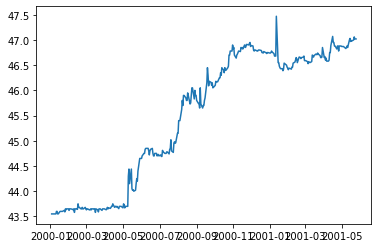

In [0]:
plt.plot(df[:365])

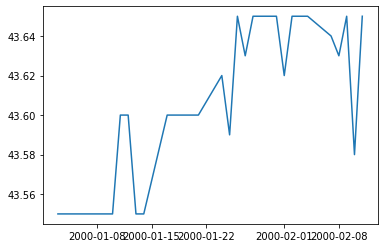

In [0]:
plt.plot(df[:30])

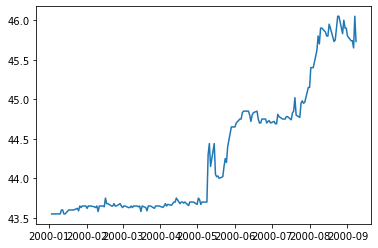

In [0]:
plt.plot(df[:180])
# It is clearly evident that there is an overall increasing trend in the data along with some seasonal variations. However, it might not always be possible to make such visual inferences (we’ll see such cases later)

In [0]:
df[:'2000-05-01']

,INDIA - INDIAN RUPEE/US$
DATE,
2000-01-03,43.55
2000-01-04,43.55
2000-01-05,43.55
2000-01-06,43.55
2000-01-07,43.55
...,...
2000-04-25,43.70
2000-04-26,43.70
2000-04-27,43.70


In [0]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=180).mean()
    rolstd = timeseries.rolling(window=180).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

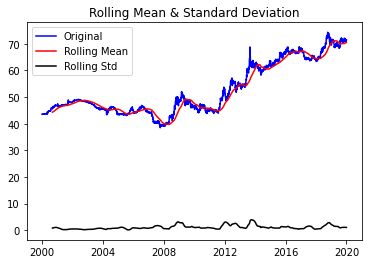

Results of Dickey-Fuller Test:
Test Statistic                   -0.093954
p-value                           0.950037
#Lags Used                       28.000000
Number of Observations Used    5188.000000
Critical Value (1%)              -3.431611
Critical Value (5%)              -2.862097
Critical Value (10%)             -2.567067
dtype: float64


In [0]:
test_stationarity(xdf['INDIA - INDIAN RUPEE/US$'])

Though the variation in standard deviation is small, mean is clearly increasing with time and this is not a stationary series. Also, the test statistic is way more than the critical values. Note that the signed values should be compared and not the absolute values.

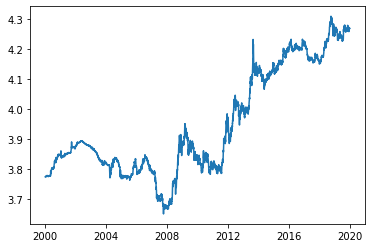

In [0]:
ts_log = np.log(df['INDIA - INDIAN RUPEE/US$'])
plt.plot(ts_log)
# trends remain same

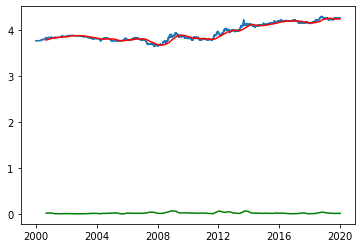

In [0]:
# moving_avg = pd.rolling_mean(ts_log,12)
moving_std= ts_log.rolling(180).std()
moving_avg = ts_log.rolling(180).mean()
plt.plot(ts_log)
plt.plot(moving_std, color='green')
plt.plot(moving_avg, color='red')

In [0]:
# why?to make a time seriers stationary we are taking out differences
# depend on time series that how gonna we make it stationsry like taking square ,log,cubetrrot.
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(180)

DATE
2000-01-03         NaN
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
                ...   
2000-09-04         NaN
2000-09-05         NaN
2000-09-06         NaN
2000-09-07         NaN
2000-09-08    0.031501
Name: INDIA - INDIAN RUPEE/US$, Length: 180, dtype: float64

In [0]:

# na values ko drop kreee h instead of that f fill b fill kr skte h
ts_log_moving_avg_diff.dropna(inplace=True)

In [0]:
ts_log_moving_avg_diff.head()

DATE
2000-09-08    0.031501
2000-09-11    0.029489
2000-09-12    0.030316
2000-09-13    0.030048
2000-09-14    0.031954
Name: INDIA - INDIAN RUPEE/US$, dtype: float64

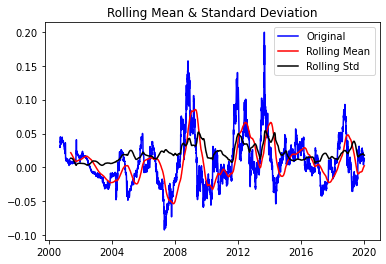

Results of Dickey-Fuller Test:
Test Statistic                   -4.746337
p-value                           0.000069
#Lags Used                       26.000000
Number of Observations Used    5011.000000
Critical Value (1%)              -3.431656
Critical Value (5%)              -2.862117
Critical Value (10%)             -2.567077
dtype: float64


In [0]:
test_stationarity(ts_log_moving_avg_diff)

This looks like a much better series. The rolling values appear to be varying slightly but there is no specific trend. Also, the test statistic is smaller than the 5% critical values so we can say with 95% confidence that this is a stationary series.

In [0]:
# ts_log_moving_avg_diff.dropna(inplace=True)
expwighted_avg = ts_log.ewm(halflife=180).mean()

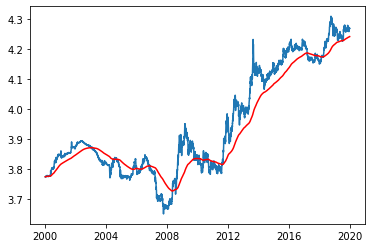

In [0]:
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

In [0]:
ts_log_ewma_diff = ts_log - expwighted_avg

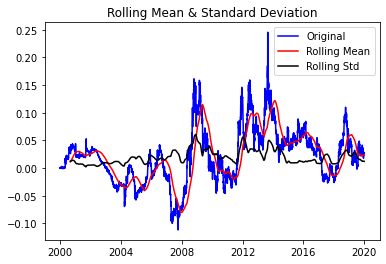

Results of Dickey-Fuller Test:
Test Statistic                   -3.353404
p-value                           0.012654
#Lags Used                       26.000000
Number of Observations Used    5190.000000
Critical Value (1%)              -3.431611
Critical Value (5%)              -2.862097
Critical Value (10%)             -2.567067
dtype: float64


In [0]:
test_stationarity(ts_log_ewma_diff)

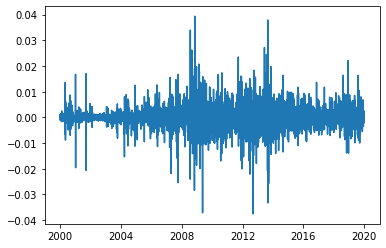

In [0]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

In [0]:
ts_log_diff.dropna(inplace=True)

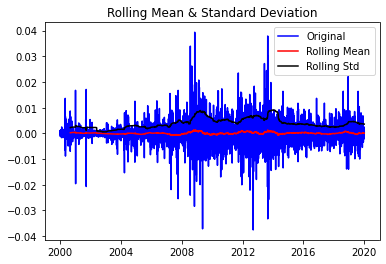

Results of Dickey-Fuller Test:
Test Statistic                -1.334076e+01
p-value                        5.926737e-25
#Lags Used                     2.500000e+01
Number of Observations Used    5.190000e+03
Critical Value (1%)           -3.431611e+00
Critical Value (5%)           -2.862097e+00
Critical Value (10%)          -2.567067e+00
dtype: float64


In [0]:
test_stationarity(ts_log_diff)

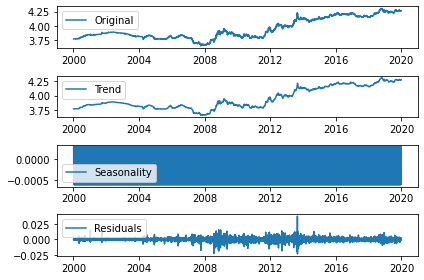

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [0]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)

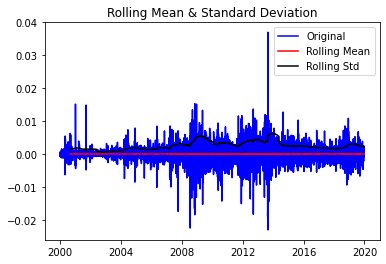

Results of Dickey-Fuller Test:
Test Statistic                  -22.096823
p-value                           0.000000
#Lags Used                       30.000000
Number of Observations Used    5182.000000
Critical Value (1%)              -3.431613
Critical Value (5%)              -2.862098
Critical Value (10%)             -2.567067
dtype: float64


In [0]:
test_stationarity(ts_log_decompose)

In [0]:
#ACF(q) and PACF(p) plots:
from statsmodels.tsa.stattools import acf, pacf

In [0]:
lag_acf = acf(ts_log_diff, nlags=365)
lag_pacf = pacf(ts_log_diff, nlags=365, method='ols')
# oridinary least square method
# other then ols

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


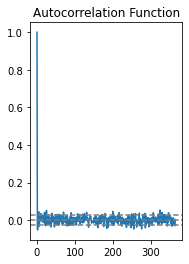

In [0]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()

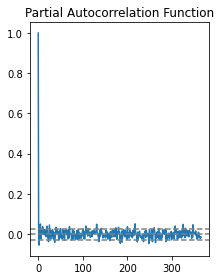

In [0]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [0]:
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 0.0977')

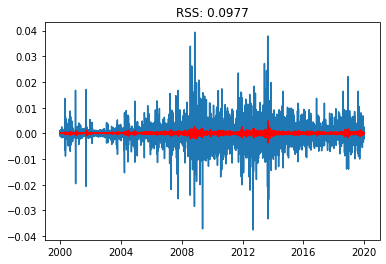

In [0]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_AR = model.fit(disp=-1) 
plt.plot(ts_log_diff)   
plt.plot(results_AR.fittedvalues, color='red')    
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))  

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 0.0967')

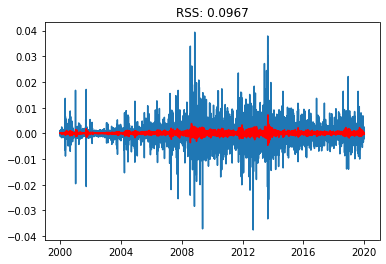

In [0]:
model = ARIMA(ts_log, order=(25,1,2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [0]:

predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

DATE
2000-01-04    0.000094
2000-01-05    0.000099
2000-01-06    0.000104
2000-01-07    0.000102
2000-01-10    0.000099
dtype: float64

In [0]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

DATE
2000-01-04    0.000094
2000-01-05    0.000192
2000-01-06    0.000296
2000-01-07    0.000399
2000-01-10    0.000497
dtype: float64

In [0]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

DATE
2000-01-03    3.773910
2000-01-04    3.774004
2000-01-05    3.774102
2000-01-06    3.774206
2000-01-07    3.774309
dtype: float64

Text(0.5, 1.0, 'RMSE: 5.5468')

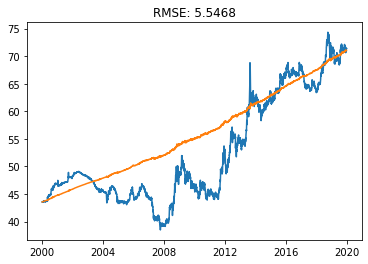

In [0]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df['INDIA - INDIAN RUPEE/US$'])
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-df['INDIA - INDIAN RUPEE/US$'])**2)/len(df['INDIA - INDIAN RUPEE/US$'])))
plt.show()

In [0]:
predictions_ARIMA

DATE
2000-01-03    43.550000
2000-01-04    43.554123
2000-01-05    43.558446
2000-01-06    43.562979
2000-01-07    43.567534
                ...    
2019-12-25    71.344743
2019-12-26    71.349404
2019-12-27    71.354054
2019-12-30    71.352630
2019-12-31    71.359272
Length: 5217, dtype: float64

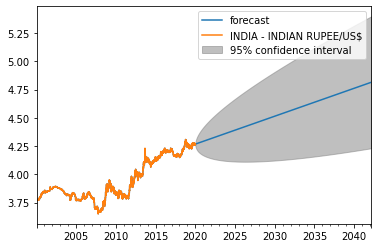

In [0]:
results_ARIMA.plot_predict(1,11000)
x=results_ARIMA.forecast(steps=120)
# plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-xdf['INDIA'])**2)/len(xdf['INDIA'])))

In [0]:
x

(array([4.26802496, 4.26803213, 4.26793847, 4.26798076, 4.26822188,
        4.2684602 , 4.26850553, 4.26843112, 4.26846586, 4.26868467,
        4.26891554, 4.26897754, 4.26892086, 4.26895086, 4.26914966,
        4.26937238, 4.26944841, 4.26940844, 4.26943558, 4.26961655,
        4.2698307 , 4.26991839, 4.26989404, 4.26991991, 4.27008508,
        4.27029044, 4.2703877 , 4.27037785, 4.27040373, 4.27055501,
        4.27075154, 4.27085652, 4.27086004, 4.270887  , 4.27102614,
        4.27121394, 4.27132503, 4.27134079, 4.27136966, 4.27149826,
        4.27167756, 4.27179335, 4.27182025, 4.27185168, 4.27197122,
        4.27214231, 4.27226159, 4.27229858, 4.27233305, 4.27244485,
        4.27260812, 4.27272986, 4.2727759 , 4.27281377, 4.27291903,
        4.2730749 , 4.27319821, 4.27325235, 4.27329385, 4.27339365,
        4.27354256, 4.27366671, 4.27372805, 4.2737733 , 4.27386859,
        4.27401104, 4.27413541, 4.2742031 , 4.27425215, 4.27434377,
        4.27448024, 4.27460434, 4.27467759, 4.27